In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import mglearn

from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter('ignore')

In [ ]:
x_data, y_data = mglearn.datasets.make_forge()
#  분류 테스트하라고 해주는 임의의 테스스셋 만들기

In [ ]:
x_data

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [ ]:
y_data

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    random_state=1, stratify=y_data)

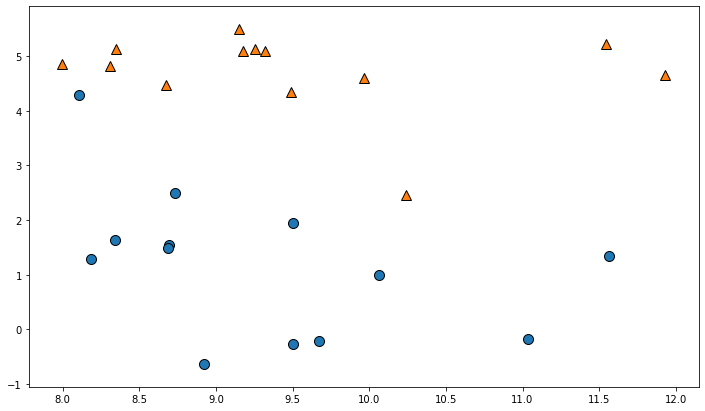

In [ ]:
plt.figure(figsize=(12,7))
mglearn.discrete_scatter(x_data[:,0],x_data[:,1],y_data)
plt.show()

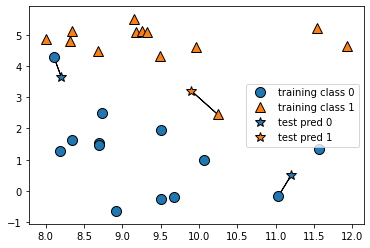

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
# 

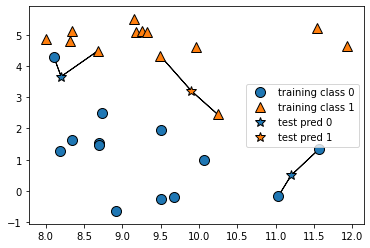

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

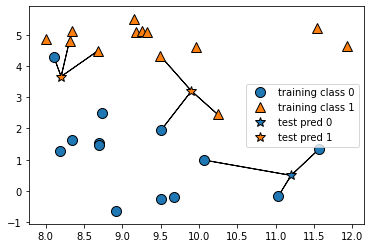

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

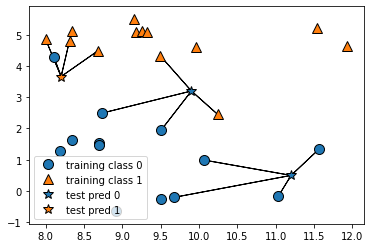

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3) # default = 5
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
model_knn.predict(x_test)

array([1, 1, 0, 0, 1, 1, 0])

In [ ]:
y_test

array([1, 1, 0, 0, 1, 1, 0])

In [ ]:
model_knn.predict([[9.5,4.5]])

array([1])

In [ ]:
model_knn.predict([[9.5,1]])

array([0])

In [ ]:
model_knn.score(x_test,y_test)

1.0

In [ ]:
param_value = {'n_neighbors' : [1,2,3,4,5]}
gridSearch = GridSearchCV(KNeighborsClassifier(),
                         param_grid=param_value)
gridSearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]})

In [ ]:
gridSearch.best_params_

{'n_neighbors': 1}

In [ ]:
gridSearch.best_score_

0.9

In [ ]:
gridSearch.best_estimator_.predict(x_test)

array([1, 0, 0, 0, 1, 1, 0])

iris 데이터 셋을 KNN을 이용해 분류

4.6, 3.1, 1.5, 0.2 예측

In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score

In [ ]:
iris = load_iris()

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
x_data, y_data = df.iloc[:,:-1], df.target
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, 
                                        stratify=y_data, random_state=1)

In [ ]:
param_grid = {'n_neighbors':[1, 2, 3, 4, 5]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='f1_macro')
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]}, scoring='f1_macro')

In [ ]:
gridSearch.best_params_

{'n_neighbors': 1}

In [ ]:
# f1-score
y_pred = grid.best_estimator_.predict(x_test)
print('test f1-score:', f1_score(y_test,y_pred, average='macro'))

test f1-score: 0.9665831244778613


In [ ]:
# 결과
res = grid.best_estimator_.predict([[4.6, 3.1, 1.5, 0.2]])
print('예측 레이블:',res[0])

예측 레이블: 0
